# Importing Libraries & Reading Preprocessed File

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("preprocessed_life_expectancy_data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# Social Factors

## Does the life expectancy rate differ in developed countries than developing? Do they have higher life expectancy or are they the same?

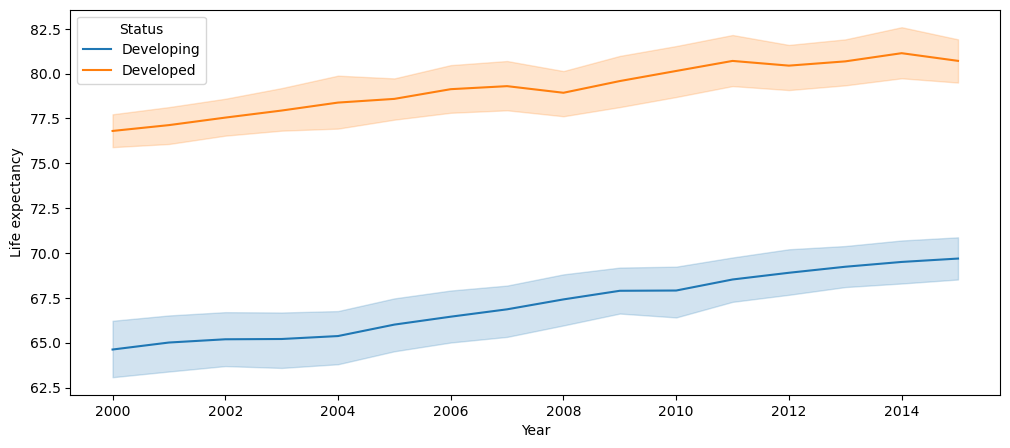

In [5]:
# Life_expectancy over the years on the basis of country status

plt.figure(figsize = (12,5))
sns.lineplot(data,x = 'Year', y = 'Life expectancy',hue = 'Status')
plt.show()

**My Findings:**

The graph shows a clear distinction in life expectancy between developed and developing countries over the years. Developed countries consistently show higher life expectancy rates compared to developing countries. While both groups show an upward trend in life expectancy, the gap between them remains significant, indicating better healthcare, living conditions, and overall development in developed countries.

## What are the Top and bottom 10 countries on Life_expectancy?

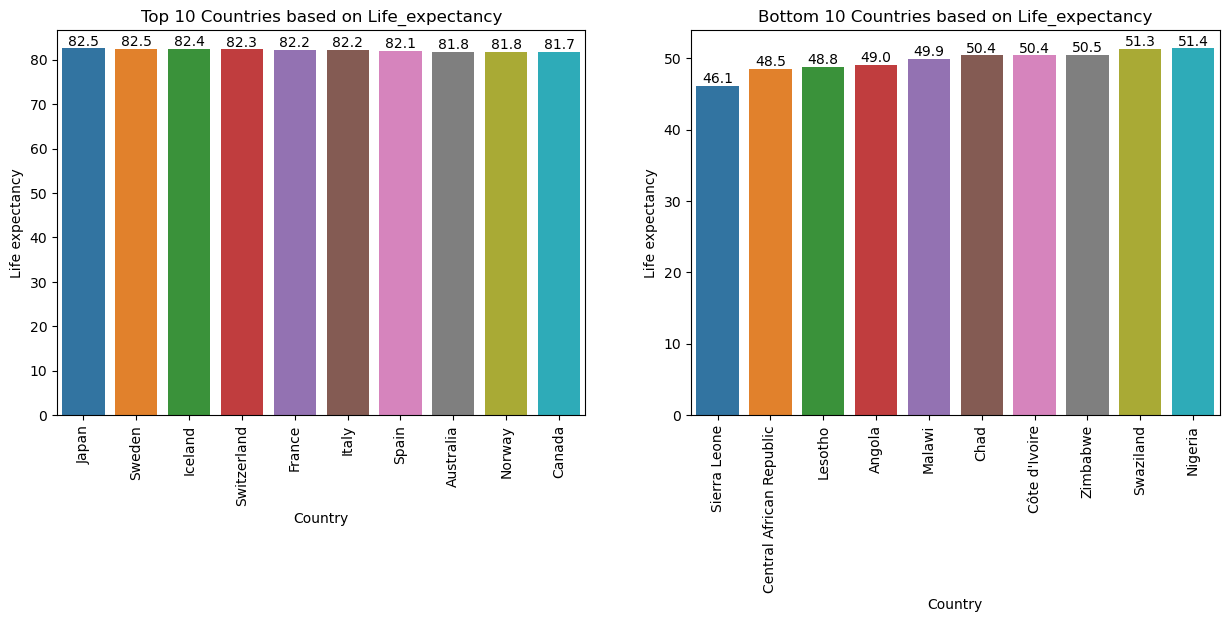

In [6]:
# Display of top and bottom 10 countries on Life_expectancy

top_data = pd.DataFrame(data.groupby('Country')['Life expectancy'].mean().sort_values(ascending = False).head(10))
bottom_data = pd.DataFrame(data.groupby('Country')['Life expectancy'].mean().sort_values(ascending = True).head(10))

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Top 10 Countries based on Life_expectancy')
ax1 = sns.barplot(top_data,x = top_data.index, y = 'Life expectancy')
ax1.bar_label(ax1.containers[0], fmt = '%.1f')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Bottom 10 Countries based on Life_expectancy')
ax2 = sns.barplot(bottom_data,x = bottom_data.index, y = 'Life expectancy')
ax2.bar_label(ax2.containers[0], fmt = '%.1f')
plt.xticks(rotation=90)
plt.show()

## How does schooling (education level) correlate with life expectancy?

Correlation between Schooling and Life Expectancy: 0.7141769989387234


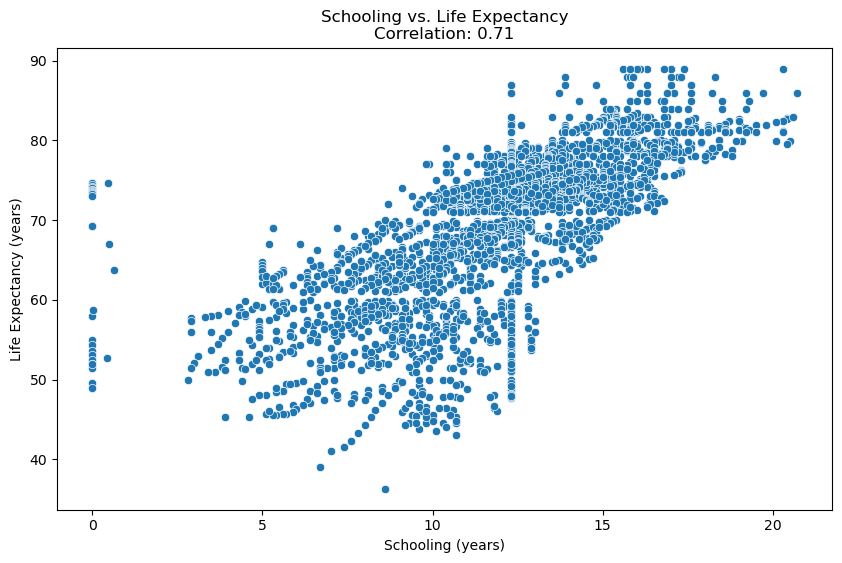

In [19]:
# Compute the correlation coefficient between Schooling and Life Expectancy
correlation_schooling_life_exp = data['Schooling'].corr(data['Life expectancy'])
print(f'Correlation between Schooling and Life Expectancy: {correlation_schooling_life_exp}')

# Scatter plot of Schooling vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Schooling', y='Life expectancy')
plt.title(f'Schooling vs. Life Expectancy\nCorrelation: {correlation_schooling_life_exp:.2f}')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy (years)')
plt.show()


**My Findings:**

The scatter plot demonstrates a strong positive correlation (0.71) between schooling (education level) and life expectancy. As the number of schooling years increases, life expectancy also tends to increase. This suggests that higher education levels are associated with longer life spans, likely due to better health awareness, improved economic opportunities, and overall better living conditions.

## How does the income composition of resources relate to schooling (education level)?

Correlation between Income Composition of Resources and Schooling: 0.8046579789044905


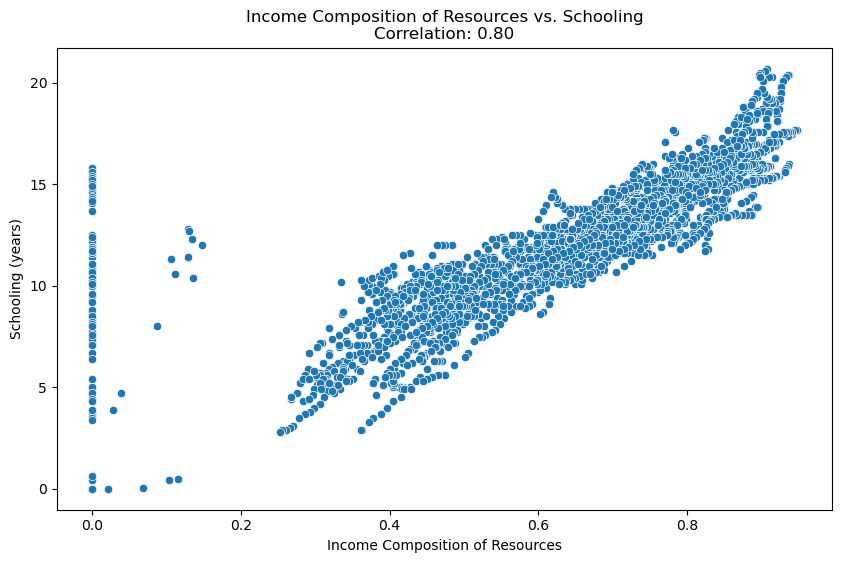

In [67]:
# Compute the correlation coefficient between Income Composition of Resources and Schooling
correlation_income_schooling = data['Income composition of resources'].corr(data['Schooling'])
print(f'Correlation between Income Composition of Resources and Schooling: {correlation_income_schooling}')

# Scatter plot of Income Composition of Resources vs. Schooling
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income composition of resources', y='Schooling')
plt.title(f'Income Composition of Resources vs. Schooling\nCorrelation: {correlation_income_schooling:.2f}')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Schooling (years)')
plt.show()


**My Findings:**

The scatter plot reveals a strong positive correlation (0.80) between the income composition of resources and schooling (education level). This indicates that countries with higher income compositions tend to have higher levels of schooling. This relationship suggests that increased financial resources allow for better educational opportunities, which in turn can lead to higher levels of schooling. 

## How does Schooling, Income Composition, and BMI levels differ for developed and developing countries? 

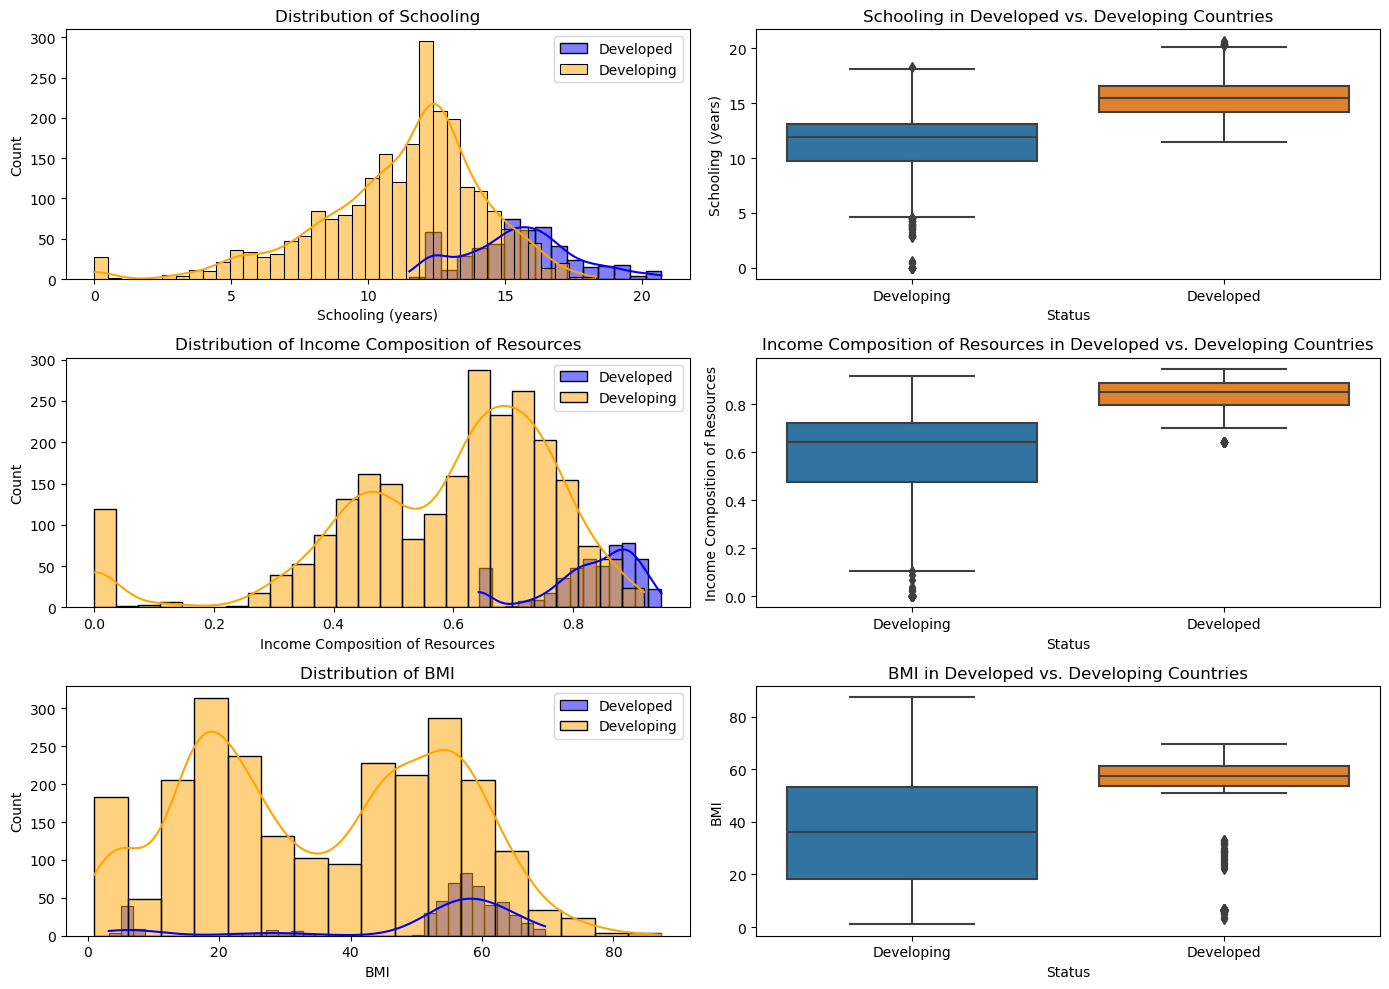

In [17]:
# Plot the distribution of Schooling, Income Composition, and BMI for developed and developing countries
developed_countries = data[data['Status'] == 'Developed']
developing_countries = data[data['Status'] == 'Developing']

plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.histplot(data=developed_countries, x='Schooling', kde=True, color='blue', label='Developed')
sns.histplot(data=developing_countries, x='Schooling', kde=True, color='orange', label='Developing')
plt.title('Distribution of Schooling')
plt.xlabel('Schooling (years)')
plt.legend()

plt.subplot(3, 2, 2)
sns.boxplot(data=data, x='Status', y='Schooling')
plt.title('Schooling in Developed vs. Developing Countries')
plt.xlabel('Status')
plt.ylabel('Schooling (years)')

plt.subplot(3, 2, 3)
sns.histplot(data=developed_countries, x='Income composition of resources', kde=True, color='blue', label='Developed')
sns.histplot(data=developing_countries, x='Income composition of resources', kde=True, color='orange', label='Developing')
plt.title('Distribution of Income Composition of Resources')
plt.xlabel('Income Composition of Resources')
plt.legend()

plt.subplot(3, 2, 4)
sns.boxplot(data=data, x='Status', y='Income composition of resources')
plt.title('Income Composition of Resources in Developed vs. Developing Countries')
plt.xlabel('Status')
plt.ylabel('Income Composition of Resources')

plt.subplot(3, 2, 5)
sns.histplot(data=developed_countries, x='BMI', kde=True, color='blue', label='Developed')
sns.histplot(data=developing_countries, x='BMI', kde=True, color='orange', label='Developing')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.legend()

plt.subplot(3, 2, 6)
sns.boxplot(data=data, x='Status', y='BMI')
plt.title('BMI in Developed vs. Developing Countries')
plt.xlabel('Status')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()


**My Findings:**

### Distribution of Schooling
- **Developed Countries:**
  - Generally have higher levels of schooling with a more concentrated distribution around higher years of schooling.

- **Developing Countries:**
  - Show a wider distribution of schooling years with many countries having lower years of schooling.
  - The median schooling years are lower, indicating lower educational levels compared to developed countries.

### Distribution of Income Composition of Resources
- **Developed Countries:**
  - Higher values of income composition of resources, indicating better resource allocation towards income.
  - The box plot shows a higher median value, reflecting better economic resources in developed countries.

- **Developing Countries:**
  - A wider distribution with many countries having lower income composition of resources.
  - The median value is lower, indicating fewer economic resources compared to developed countries.

### Distribution of BMI
- **Developed Countries:**
  - Higher BMI values are more common, reflecting potential lifestyle differences and better nutrition.
  - The box plot shows a higher median BMI compared to developing countries.

- **Developing Countries:**
  - Wider distribution with lower BMI values, possibly indicating malnutrition or different lifestyle factors.
  - The median BMI is lower, reflecting different health and nutrition status compared to developed countries.

### Conclusion:
- Schooling, income composition, and BMI levels are all higher in developed countries compared to developing countries.
- This suggests better educational, economic, and nutritional conditions in developed countries, contributing to higher life expectancy.

## What do countries with the highest and lowest life expectancy differ in terms of comparing social factors such as Alcohol consumption, and Thinness 1-19 years? What does the difference look like? Is it significant?

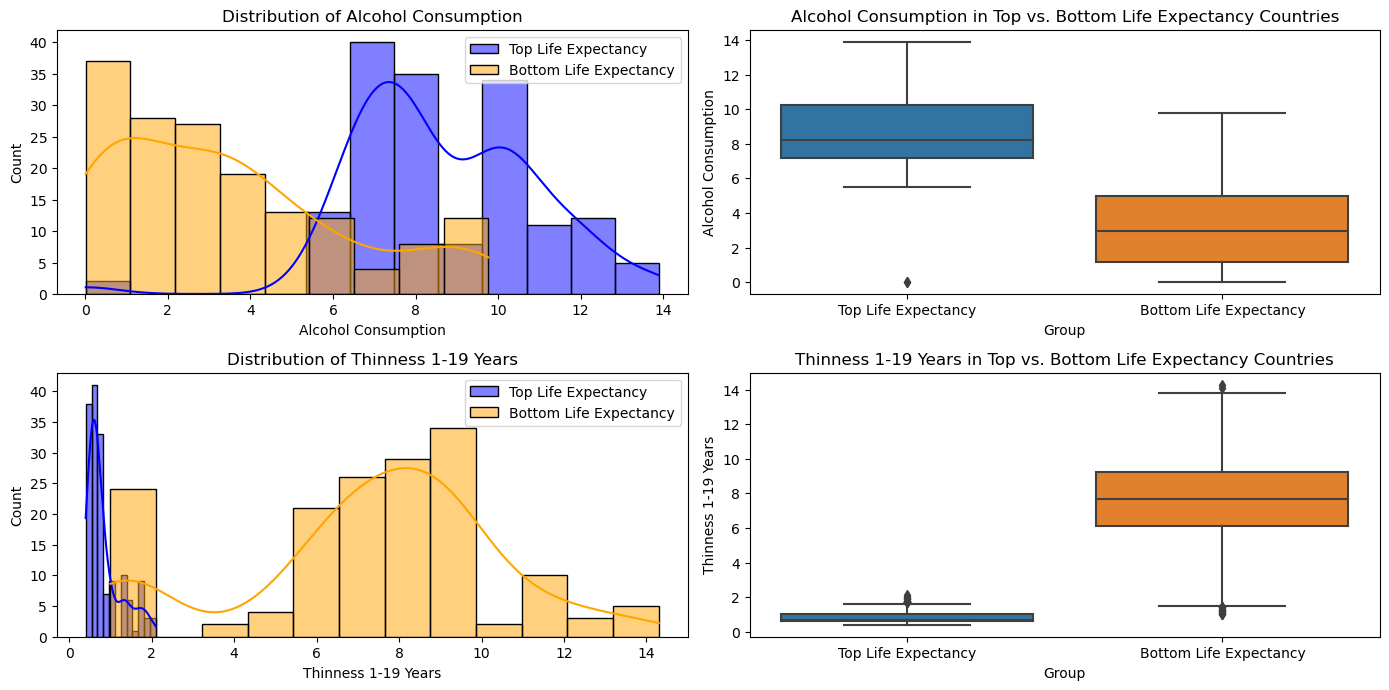

In [52]:
# Calculate the average life expectancy for each country
avg_life_expectancy_by_country = data.groupby('Country')['Life expectancy'].mean().reset_index()

# Find the top 10 and bottom 10 countries by average life expectancy
top_10_life_expectancy = avg_life_expectancy_by_country.nlargest(10, 'Life expectancy')
bottom_10_life_expectancy = avg_life_expectancy_by_country.nsmallest(10, 'Life expectancy')

# Filter data for top 10 and bottom 10 countries
top_countries = data[data['Country'].isin(top_10_life_expectancy['Country'])].copy()
bottom_countries = data[data['Country'].isin(bottom_10_life_expectancy['Country'])].copy()

# Add a column to indicate the group
top_countries.loc[:, 'Group'] = 'Top Life Expectancy'
bottom_countries.loc[:, 'Group'] = 'Bottom Life Expectancy'

# Combine the data
combined_data = pd.concat([top_countries, bottom_countries])

# Plot the distribution of Alcohol, Thinness 1-19 years, and Thinness 5-9 years for top and bottom life expectancy countries
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.histplot(data=combined_data[combined_data['Group'] == 'Top Life Expectancy'], x='Alcohol', kde=True, color='blue', label='Top Life Expectancy')
sns.histplot(data=combined_data[combined_data['Group'] == 'Bottom Life Expectancy'], x='Alcohol', kde=True, color='orange', label='Bottom Life Expectancy')
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.legend()

plt.subplot(3, 2, 2)
sns.boxplot(data=combined_data, x='Group', y='Alcohol')
plt.title('Alcohol Consumption in Top vs. Bottom Life Expectancy Countries')
plt.xlabel('Group')
plt.ylabel('Alcohol Consumption')

plt.subplot(3, 2, 3)
sns.histplot(data=combined_data[combined_data['Group'] == 'Top Life Expectancy'], x='thinness  1-19 years', kde=True, color='blue', label='Top Life Expectancy')
sns.histplot(data=combined_data[combined_data['Group'] == 'Bottom Life Expectancy'], x='thinness  1-19 years', kde=True, color='orange', label='Bottom Life Expectancy')
plt.title('Distribution of Thinness 1-19 Years')
plt.xlabel('Thinness 1-19 Years')
plt.legend()

plt.subplot(3, 2, 4)
sns.boxplot(data=combined_data, x='Group', y='thinness  1-19 years')
plt.title('Thinness 1-19 Years in Top vs. Bottom Life Expectancy Countries')
plt.xlabel('Group')
plt.ylabel('Thinness 1-19 Years')

plt.tight_layout()
plt.show()


**My Findings:**

### Distribution of Alcohol Consumption
- **Top Life Expectancy Countries:**
  - The distribution shows that these countries have higher alcohol consumption on average.
  - The box plot indicates a higher median alcohol consumption compared to countries with bottom life expectancy, reflecting lifestyle differences.

- **Bottom Life Expectancy Countries:**
  - These countries show a lower average alcohol consumption.
  - The box plot shows a lower median value, indicating different social or cultural norms around alcohol consumption.

### Distribution of Thinness 1-19 Years
- **Top Life Expectancy Countries:**
  - The distribution indicates lower thinness levels in these countries, suggesting better nutrition and health.
  - The box plot shows a lower median thinness level compared to countries with bottom life expectancy.

- **Bottom Life Expectancy Countries:**
  - These countries have higher levels of thinness among the 1-19 years age group.
  - The box plot indicates a higher median thinness level, reflecting possible malnutrition or health issues.

### Conclusion:
- Countries with higher life expectancy tend to have higher alcohol consumption and lower thinness levels among the youth.
- Countries with lower life expectancy show lower alcohol consumption and higher levels of thinness, indicating potential health and nutrition challenges.
- These differences highlight the impact of social factors such as diet, health, and lifestyle on life expectancy.

# Mortality Factors

## How do mortality trends (e.g., under-five deaths) differ between high-income and low-income countries?

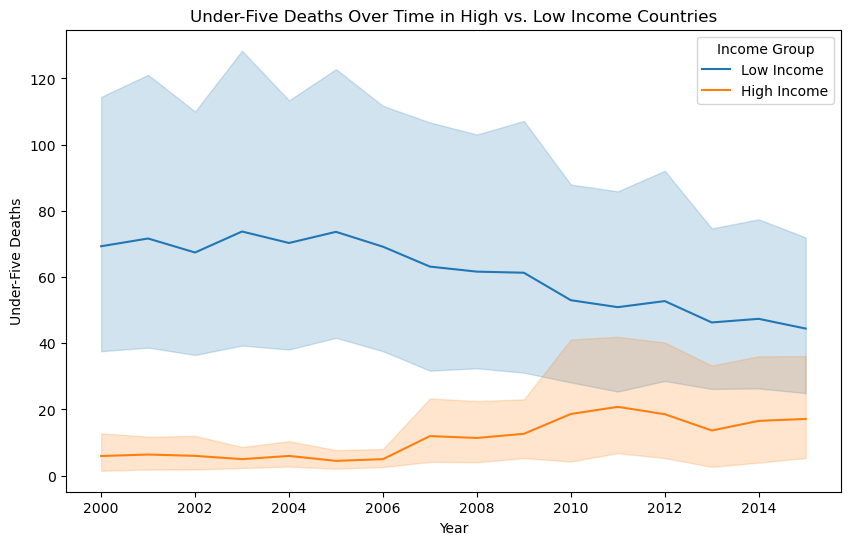

In [37]:
#Mortality Trends in High vs. Low Income Countries

# Define a threshold to classify countries as high or low income based on GDP
threshold = data['GDP'].median()

# Classify countries
data['Income Group'] = data['GDP'].apply(lambda x: 'High Income' if x > threshold else 'Low Income')

# Line plots of under-five deaths over time for high-income and low-income countries
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='under-five deaths', hue='Income Group')
plt.title('Under-Five Deaths Over Time in High vs. Low Income Countries')
plt.xlabel('Year')
plt.ylabel('Under-Five Deaths')
plt.show()



**My Findings**

- **High Income Countries:**
  - The line plot shows a significantly lower number of under-five deaths over the years.
  - The trend remains relatively stable with a slight decline, indicating effective health interventions and access to medical care.

- **Low Income Countries:**
  - The line plot shows a much higher number of under-five deaths compared to high-income countries.
  - Although there is a decreasing trend over the years, the numbers remain considerably higher, indicating persistent challenges in healthcare access and quality.

#### **Conclusion:**
- High-income countries consistently have lower under-five death rates compared to low-income countries.
- Despite improvements, low-income countries still struggle with higher child mortality rates.

## Is there a strong relationship between infant deaths and under-five deaths?

Correlation between Infant Deaths and Under-Five Deaths: 0.9966288820398032


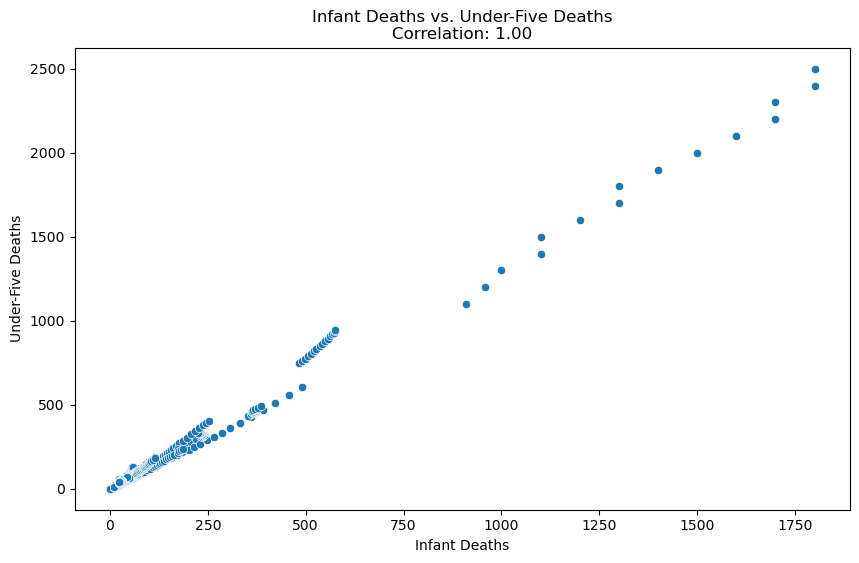

In [63]:
#Compute the correlation coefficient between Infant Deaths and Under-Five Deaths
correlation_infant_under_five = data['infant deaths'].corr(data['under-five deaths'])
print(f'Correlation between Infant Deaths and Under-Five Deaths: {correlation_infant_under_five}')

# Scatter plot of Infant Deaths vs. Under-Five Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='infant deaths', y='under-five deaths')
plt.title(f'Infant Deaths vs. Under-Five Deaths\nCorrelation: {correlation_infant_under_five:.2f}')
plt.xlabel('Infant Deaths')
plt.ylabel('Under-Five Deaths')
plt.show()


**My Findings**

- There is a very strong relationship between infant deaths and under-five deaths.
- This suggests that efforts to reduce infant mortality would significantly impact the overall reduction of under-five deaths.
- Healthcare interventions targeting infant survival are crucial for improving child survival rates up to five years old.

## What are the adult mortality rates at developed countries in comparison to developing countries?

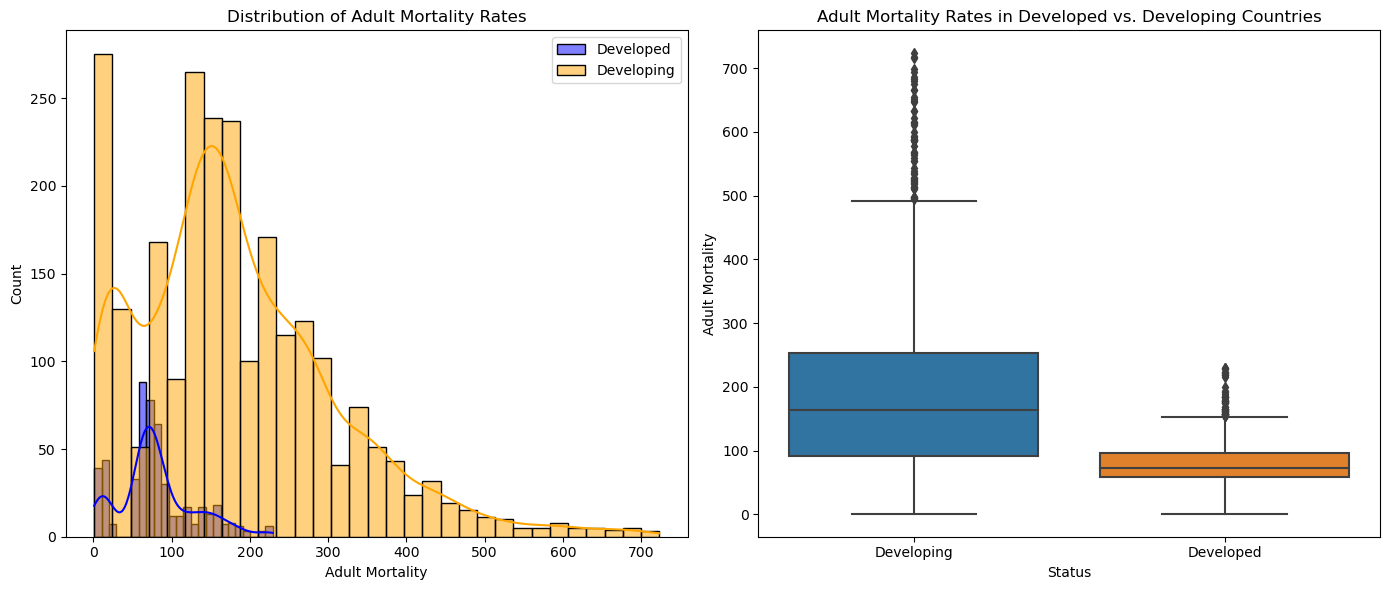

In [38]:
# Plot Adult Mortality Rates in developed and developing countries
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=developed_countries, x='Adult Mortality', kde=True, color='blue', label='Developed')
sns.histplot(data=developing_countries, x='Adult Mortality', kde=True, color='orange', label='Developing')
plt.title('Distribution of Adult Mortality Rates')
plt.xlabel('Adult Mortality')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Status', y='Adult Mortality')
plt.title('Adult Mortality Rates in Developed vs. Developing Countries')
plt.xlabel('Status')
plt.ylabel('Adult Mortality')

plt.tight_layout()
plt.show()


**My Findings**

- The histogram shows a clear distinction in the distribution of adult mortality rates between developed and developing countries.
- Developed countries (blue) have a much lower range and concentration of adult mortality rates, with most values clustering below 200.
- Developing countries (orange) display a broader range of adult mortality rates, with many countries experiencing rates well above 200.
- Developing countries have a higher median adult mortality rate with many outliers and a wider spread of values.
- Developed countries have a lower median adult mortality rate with fewer outliers, and their values are tightly packed.


## What do the mortality rates (infant, under-five, and adult) look like between the countries with the highest and lowest GDP? Does the GDP actually makes a difference?

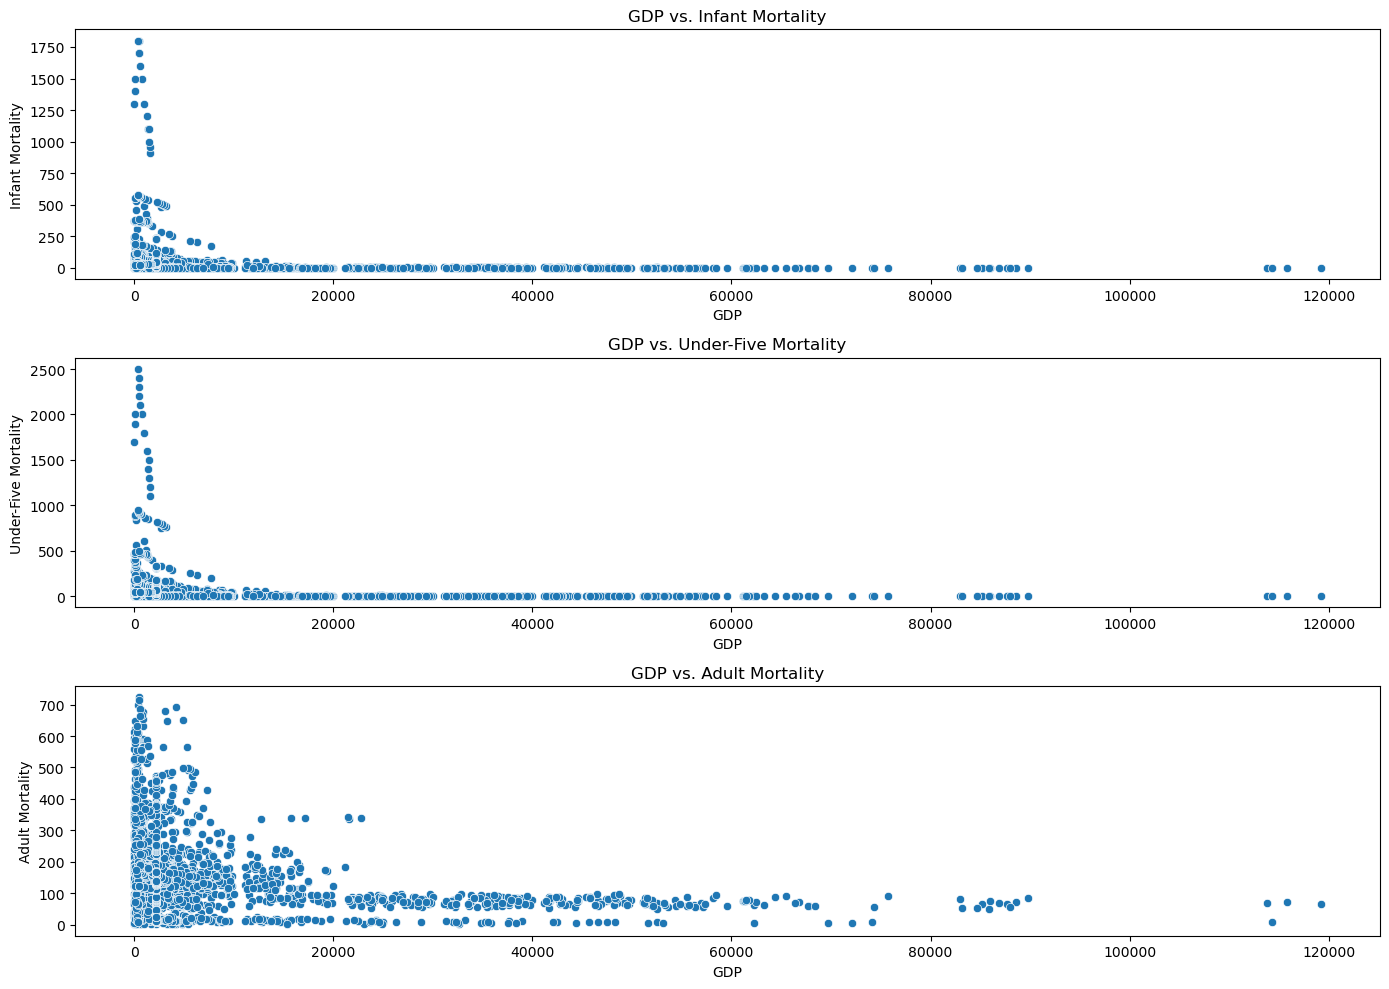

In [41]:
# Plot mortality rates (infant, under-five, and adult) vs. GDP
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
sns.scatterplot(data=data, x='GDP', y='infant deaths')
plt.title('GDP vs. Infant Mortality')
plt.xlabel('GDP')
plt.ylabel('Infant Mortality')

plt.subplot(3, 1, 2)
sns.scatterplot(data=data, x='GDP', y='under-five deaths')
plt.title('GDP vs. Under-Five Mortality')
plt.xlabel('GDP')
plt.ylabel('Under-Five Mortality')

plt.subplot(3, 1, 3)
sns.scatterplot(data=data, x='GDP', y='Adult Mortality')
plt.title('GDP vs. Adult Mortality')
plt.xlabel('GDP')
plt.ylabel('Adult Mortality')

plt.tight_layout()
plt.show()



**My Findings**


- **GDP vs. Infant Mortality:**
  - The scatter plot shows a clear negative correlation between GDP and infant mortality rates.
  - Countries with higher GDPs generally have lower infant mortality rates.

- **GDP vs. Under-Five Mortality:**
  - A similar trend is observed in the scatter plot for under-five mortality.
  - Higher GDP countries have much lower under-five mortality rates.
  - Lower GDP countries show a wide spread of under-five mortality rates, with many values exceeding 2000.

- **GDP vs. Adult Mortality:**
  - The scatter plot for adult mortality also reveals a negative correlation with GDP.
  - Higher GDP countries have lower adult mortality rates, clustering around lower values.
  - Lower GDP countries show higher adult mortality rates with a more significant spread, reaching up to 700.

#### **Conclusion:**

- **There is a strong negative correlation between GDP and all forms of mortality (infant, under-five, and adult).**
- **Countries with higher GDPs have significantly lower mortality rates across all age groups, indicating better healthcare, nutrition, and living conditions.**
- **Overall, GDP is a critical factor in determining mortality rates, with wealthier countries experiencing better health outcomes.**

## What do Infant Mortality, Under-Five Mortality, and Adult Mortality for top and bottom life expectancy countries look like? Is there a differencec between them?

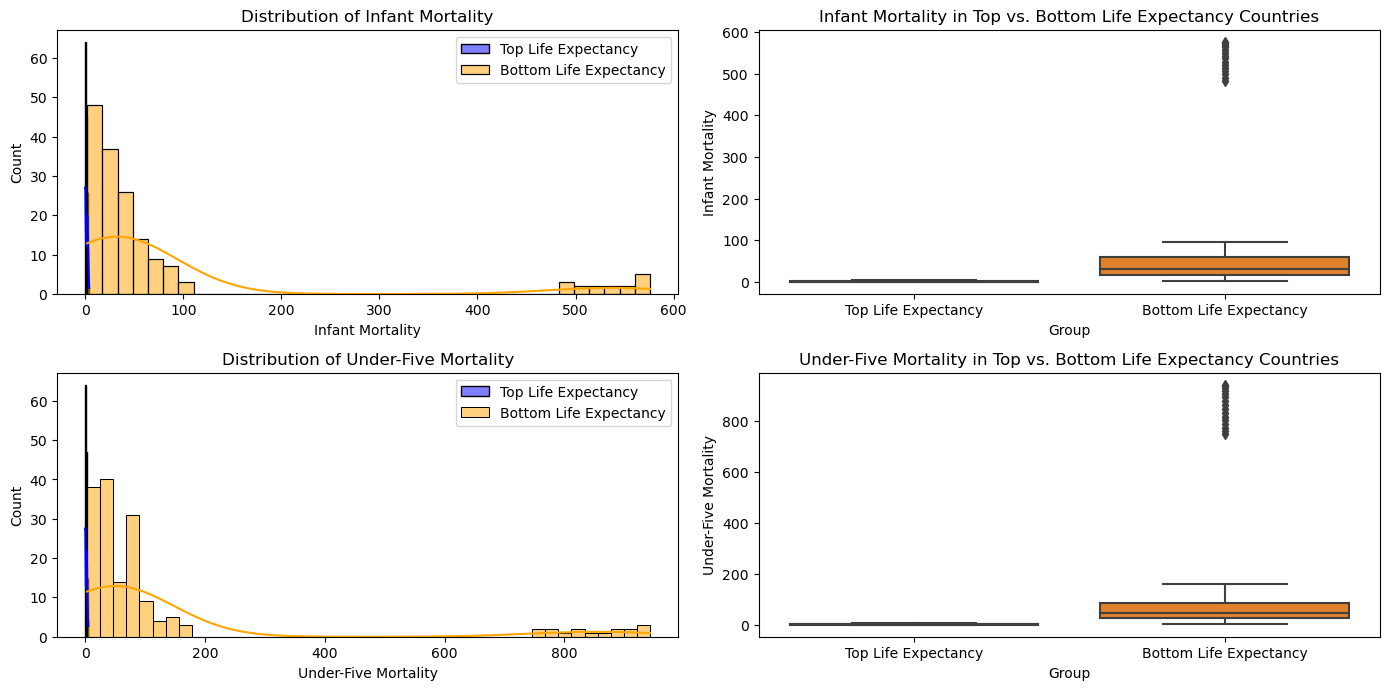

In [55]:
# Calculate the average life expectancy for each country
avg_life_expectancy_by_country = data.groupby('Country')['Life expectancy'].mean().reset_index()

# Find the top 10 and bottom 10 countries by average life expectancy
top_10_life_expectancy = avg_life_expectancy_by_country.nlargest(10, 'Life expectancy')
bottom_10_life_expectancy = avg_life_expectancy_by_country.nsmallest(10, 'Life expectancy')

# Filter data for top 10 and bottom 10 countries
top_countries = data[data['Country'].isin(top_10_life_expectancy['Country'])].copy()
bottom_countries = data[data['Country'].isin(bottom_10_life_expectancy['Country'])].copy()

# Add a column to indicate the group
top_countries.loc[:, 'Group'] = 'Top Life Expectancy'
bottom_countries.loc[:, 'Group'] = 'Bottom Life Expectancy'

# Combine the data
combined_data = pd.concat([top_countries, bottom_countries])


# Plot the distribution of Infant Mortality, Under-Five Mortality, and Adult Mortality for top and bottom life expectancy countries
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.histplot(data=combined_data[combined_data['Group'] == 'Top Life Expectancy'], x='infant deaths', kde=True, color='blue', label='Top Life Expectancy')
sns.histplot(data=combined_data[combined_data['Group'] == 'Bottom Life Expectancy'], x='infant deaths', kde=True, color='orange', label='Bottom Life Expectancy')
plt.title('Distribution of Infant Mortality')
plt.xlabel('Infant Mortality')
plt.legend()

plt.subplot(3, 2, 2)
sns.boxplot(data=combined_data, x='Group', y='infant deaths')
plt.title('Infant Mortality in Top vs. Bottom Life Expectancy Countries')
plt.xlabel('Group')
plt.ylabel('Infant Mortality')

plt.subplot(3, 2, 3)
sns.histplot(data=combined_data[combined_data['Group'] == 'Top Life Expectancy'], x='under-five deaths', kde=True, color='blue', label='Top Life Expectancy')
sns.histplot(data=combined_data[combined_data['Group'] == 'Bottom Life Expectancy'], x='under-five deaths', kde=True, color='orange', label='Bottom Life Expectancy')
plt.title('Distribution of Under-Five Mortality')
plt.xlabel('Under-Five Mortality')
plt.legend()

plt.subplot(3, 2, 4)
sns.boxplot(data=combined_data, x='Group', y='under-five deaths')
plt.title('Under-Five Mortality in Top vs. Bottom Life Expectancy Countries')
plt.xlabel('Group')
plt.ylabel('Under-Five Mortality')


plt.tight_layout()
plt.show()


** My Findings **

- **Infant Mortality:**
  - The distribution of infant mortality rates shows a significant difference between countries with the highest and lowest life expectancy.
  - Countries with top life expectancy have a much lower distribution of infant mortality rates compared to those with bottom life expectancy.
  - The box plot confirms this observation, with the median and spread of infant mortality rates being significantly lower in countries with high life expectancy.

- **Under-Five Mortality:**
  - Similar to infant mortality, under-five mortality rates are much lower in countries with high life expectancy compared to those with low life expectancy.

- **Adult Mortality:**
  - Countries with high life expectancy have a lower distribution of adult mortality rates, while those with low life expectancy have higher and more varied adult mortality rates.

#### **Conclusion:**

- **There is a clear and significant difference in mortality rates (infant, under-five, and adult) between countries with the highest and lowest life expectancy.**

# Immunization Related factors

## Is there a relationship between childeren and adult deaths with immunizationed diseases? Is less immunization the lead cause to higher deaths?

/var/folders/f9/vf13tj_93t78jv86r47nbqfr0000gn/T/ipykernel_12554/2048189816.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  correlations_pivot = correlations_df.pivot('Mortality Type', 'Immunization Type', 'Correlation')


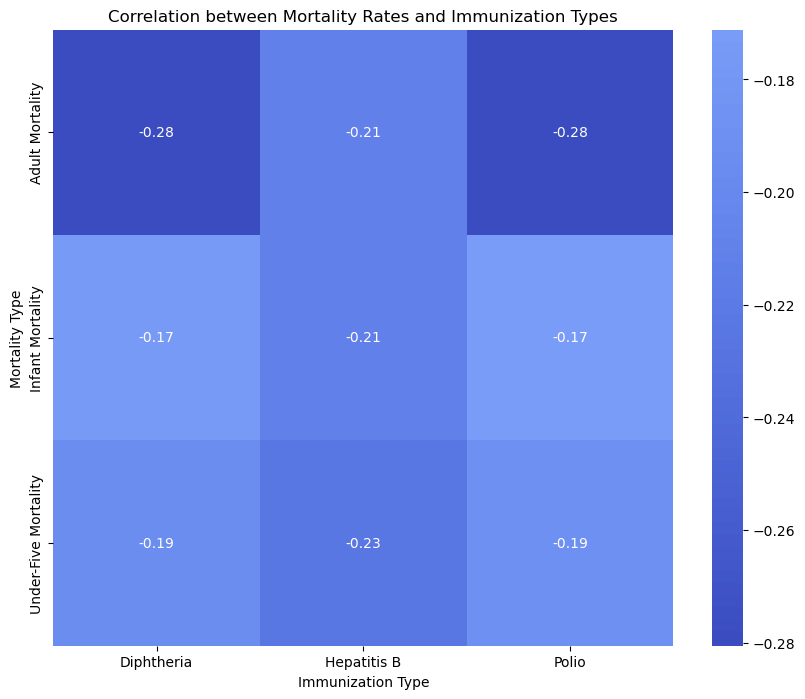

In [67]:
# Compute the correlation coefficients between mortality rates and immunization rates
correlations_mortality_immunization = {
    'Infant Mortality vs. Hepatitis B': data['infant deaths'].corr(data['Hepatitis B']),
    'Under-Five Mortality vs. Hepatitis B': data['under-five deaths'].corr(data['Hepatitis B']),
    'Adult Mortality vs. Hepatitis B': data['Adult Mortality'].corr(data['Hepatitis B']),
    'Infant Mortality vs. Polio': data['infant deaths'].corr(data['Polio']),
    'Under-Five Mortality vs. Polio': data['under-five deaths'].corr(data['Polio']),
    'Adult Mortality vs. Polio': data['Adult Mortality'].corr(data['Polio']),
    'Infant Mortality vs. Diphtheria': data['infant deaths'].corr(data['Diphtheria']),
    'Under-Five Mortality vs. Diphtheria': data['under-five deaths'].corr(data['Diphtheria']),
    'Adult Mortality vs. Diphtheria': data['Adult Mortality'].corr(data['Diphtheria']),
}

correlations_df = pd.DataFrame(list(correlations_mortality_immunization.items()), columns=['Factors', 'Correlation'])
correlations_df[['Mortality Type', 'Immunization Type']] = correlations_df['Factors'].str.split(' vs. ', expand=True)
correlations_pivot = correlations_df.pivot('Mortality Type', 'Immunization Type', 'Correlation')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_pivot, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Mortality Rates and Immunization Types')
plt.show()


**My Findings**

Since the correlations are weak, this indicates that while there is a relationship between higher immunization rates and lower mortality rates, the strength of this relationship is not substantial. Other factors likely also play significant roles in influencing mortality rates.

## How do immunization rates for Hepatitis B, Measles, Polio, and Diphtheria compare between countries with the highest and lowest life expectancy rates, and do financial constraints play a role in these differences?

/var/folders/f9/vf13tj_93t78jv86r47nbqfr0000gn/T/ipykernel_12554/2951141298.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=combined_data, x='Year', y='Hepatitis B', hue='Group', ci=None)
/var/folders/f9/vf13tj_93t78jv86r47nbqfr0000gn/T/ipykernel_12554/2951141298.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=combined_data, x='Year', y='Measles', hue='Group', ci=None)
/var/folders/f9/vf13tj_93t78jv86r47nbqfr0000gn/T/ipykernel_12554/2951141298.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=combined_data, x='Year', y='Polio', hue='Group', ci=None)
/var/folders/f9/vf13tj_93t78jv86r47nbqfr0000gn/T/ipykernel_12554/2951141298.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=combined_data, x='Year', y='Diphth

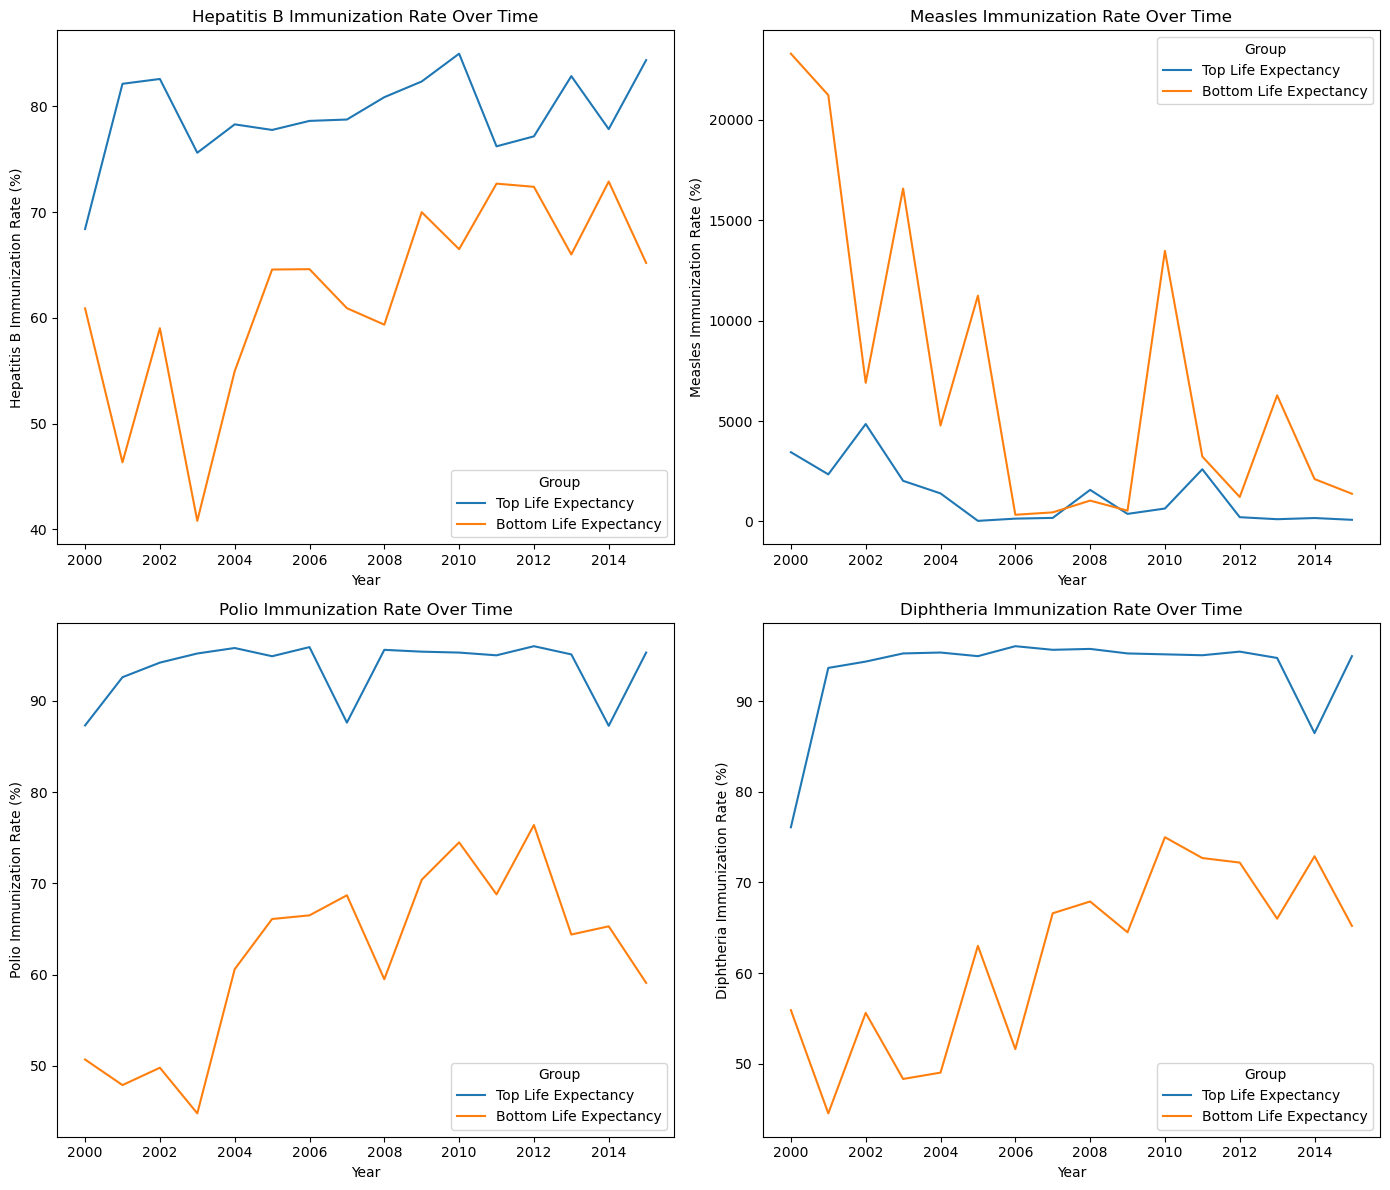

/var/folders/f9/vf13tj_93t78jv86r47nbqfr0000gn/T/ipykernel_12554/2951141298.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=combined_data, x='Year', y='GDP', hue='Group', ci=None)
/var/folders/f9/vf13tj_93t78jv86r47nbqfr0000gn/T/ipykernel_12554/2951141298.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=combined_data, x='Year', y='Total expenditure', hue='Group', ci=None)


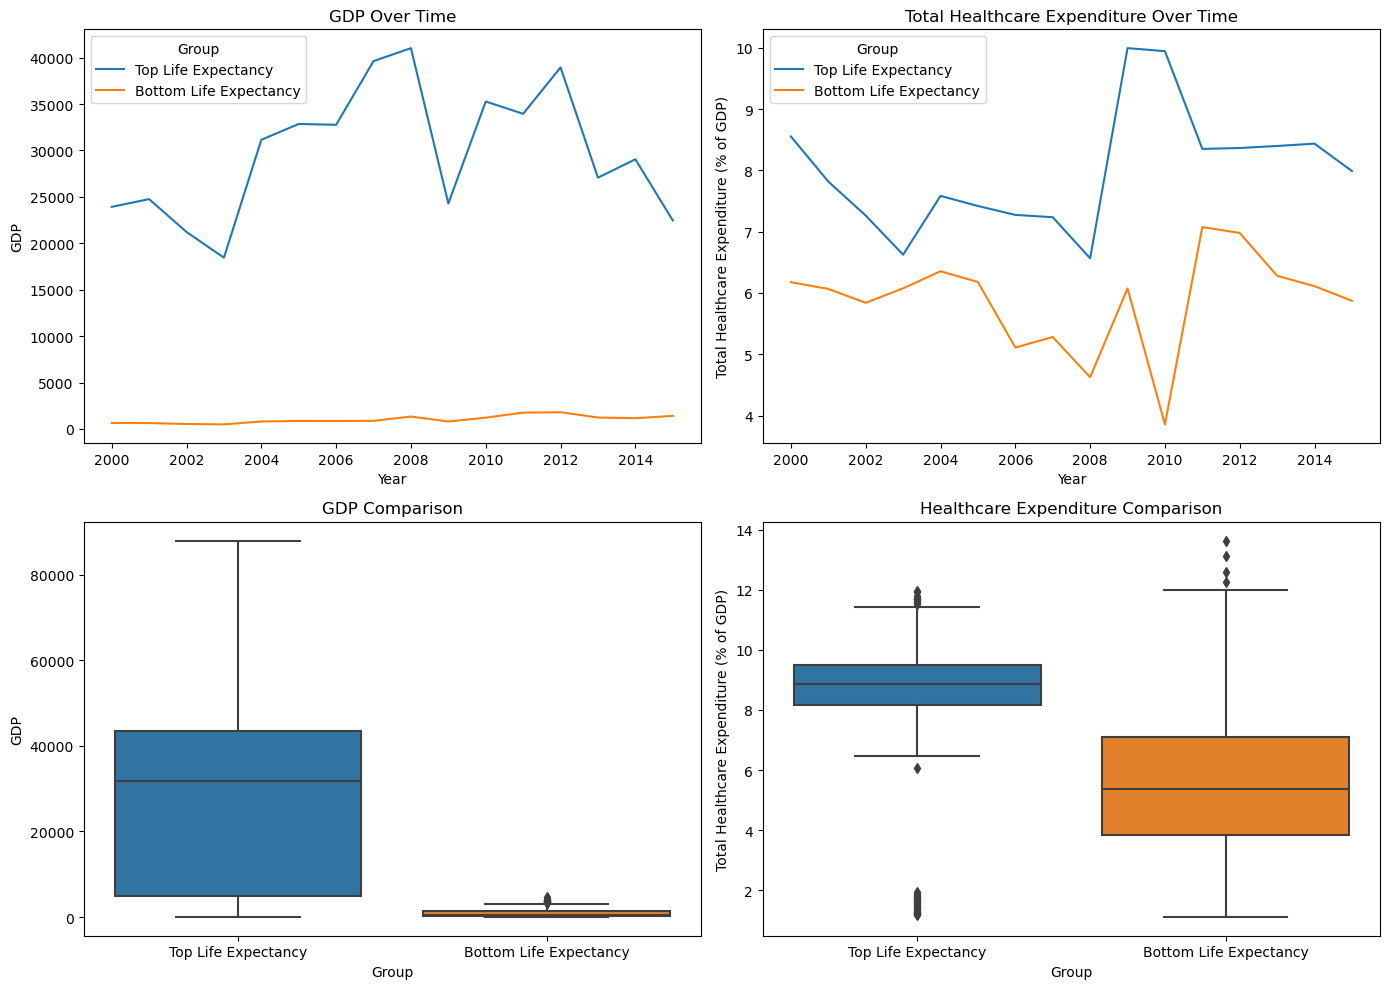

In [56]:
# Calculate the average life expectancy for each country
avg_life_expectancy_by_country = data.groupby('Country')['Life expectancy'].mean().reset_index()

# Find the top 10 and bottom 10 countries by average life expectancy
top_10_life_expectancy = avg_life_expectancy_by_country.nlargest(10, 'Life expectancy')
bottom_10_life_expectancy = avg_life_expectancy_by_country.nsmallest(10, 'Life expectancy')

# Filter data for top 10 and bottom 10 countries
top_countries = data[data['Country'].isin(top_10_life_expectancy['Country'])].copy()
bottom_countries = data[data['Country'].isin(bottom_10_life_expectancy['Country'])].copy()

# Add a column to indicate the group
top_countries.loc[:, 'Group'] = 'Top Life Expectancy'
bottom_countries.loc[:, 'Group'] = 'Bottom Life Expectancy'

# Combine the data
combined_data = pd.concat([top_countries, bottom_countries])

# Plot the immunization rates over time for top and bottom life expectancy countries
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.lineplot(data=combined_data, x='Year', y='Hepatitis B', hue='Group', ci=None)
plt.title('Hepatitis B Immunization Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Hepatitis B Immunization Rate (%)')

plt.subplot(2, 2, 2)
sns.lineplot(data=combined_data, x='Year', y='Measles', hue='Group', ci=None)
plt.title('Measles Immunization Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Measles Immunization Rate (%)')

plt.subplot(2, 2, 3)
sns.lineplot(data=combined_data, x='Year', y='Polio', hue='Group', ci=None)
plt.title('Polio Immunization Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Polio Immunization Rate (%)')

plt.subplot(2, 2, 4)
sns.lineplot(data=combined_data, x='Year', y='Diphtheria', hue='Group', ci=None)
plt.title('Diphtheria Immunization Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Diphtheria Immunization Rate (%)')

plt.tight_layout()
plt.show()

# Plot GDP and Total Healthcare Expenditure for top and bottom life expectancy countries
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.lineplot(data=combined_data, x='Year', y='GDP', hue='Group', ci=None)
plt.title('GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.subplot(2, 2, 2)
sns.lineplot(data=combined_data, x='Year', y='Total expenditure', hue='Group', ci=None)
plt.title('Total Healthcare Expenditure Over Time')
plt.xlabel('Year')
plt.ylabel('Total Healthcare Expenditure (% of GDP)')

plt.subplot(2, 2, 3)
sns.boxplot(data=combined_data, x='Group', y='GDP')
plt.title('GDP Comparison')
plt.xlabel('Group')
plt.ylabel('GDP')

plt.subplot(2, 2, 4)
sns.boxplot(data=combined_data, x='Group', y='Total expenditure')
plt.title('Healthcare Expenditure Comparison')
plt.xlabel('Group')
plt.ylabel('Total Healthcare Expenditure (% of GDP)')

plt.tight_layout()
plt.show()




**My Findings**

- **Hepatitis B Immunization:**
  - Higher life expectancy countries have immunization rates consistently above 80%, whereas lower life expectancy countries often fall below 60%.

- **Measles Immunization:**
  - The volatility in immunization rates in lower life expectancy countries might suggest inconsistent healthcare infrastructure and financial constraints.

- **Polio and Diphtheria Immunization:**
  - Both show a clear distinction where higher life expectancy countries maintain rates above 90%, highlighting the importance of sustained immunization programs.

- **Economic Factors:**
  - The significant disparity in GDP highlights the financial capability of higher life expectancy countries to support robust healthcare systems, including immunization programs.
  - Higher healthcare expenditure as a percentage of GDP in higher life expectancy countries underscores the commitment to health investment, which likely contributes to better immunization coverage.

#### **Conclusion:**

- **Immunization rates are generally higher and more stable in countries with higher life expectancy, indicating better healthcare systems and sustained immunization efforts.**
- **Financial constraints play a crucial role in these differences, with higher GDP and greater healthcare expenditure in higher life expectancy countries facilitating better immunization rates.**

# Economical Factors

## Are countries with lower life expectancy not dedicating a portion of their GDP to healthcare and simply ignoring it? Is this why they are having high death rates?

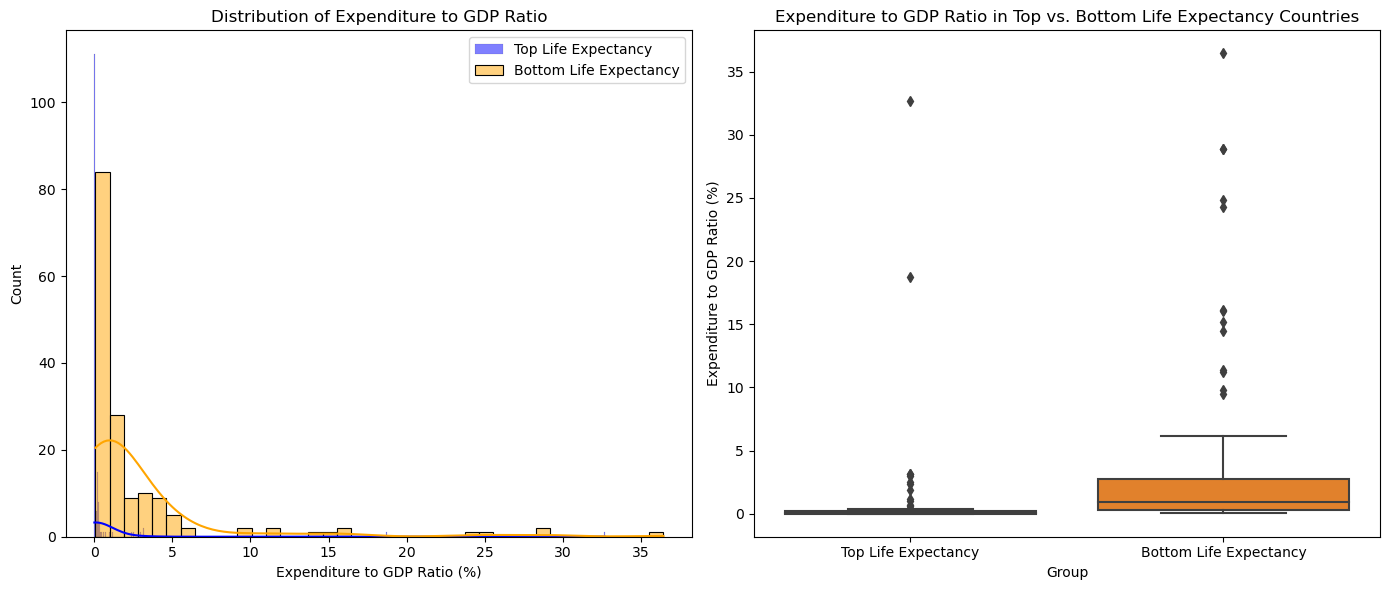

T-test for Expenditure to GDP Ratio: t-statistic = -4.60, p-value = 6.24e-06


In [60]:
# Calculate the average life expectancy for each country
avg_life_expectancy_by_country = data.groupby('Country')['Life expectancy'].mean().reset_index()

# Find the top 10 and bottom 10 countries by average life expectancy
top_10_life_expectancy = avg_life_expectancy_by_country.nlargest(10, 'Life expectancy')
bottom_10_life_expectancy = avg_life_expectancy_by_country.nsmallest(10, 'Life expectancy')

# Filter data for top 10 and bottom 10 countries
top_countries = data[data['Country'].isin(top_10_life_expectancy['Country'])].copy()
bottom_countries = data[data['Country'].isin(bottom_10_life_expectancy['Country'])].copy()

# Add a column to indicate the group
top_countries.loc[:, 'Group'] = 'Top Life Expectancy'
bottom_countries.loc[:, 'Group'] = 'Bottom Life Expectancy'

# Combine the data
combined_data = pd.concat([top_countries, bottom_countries])


# Calculate healthcare expenditure as a percentage of GDP
combined_data['Expenditure to GDP Ratio'] = (combined_data['Total expenditure'] / combined_data['GDP']) * 100

# Plot the healthcare expenditure as a percentage of GDP for top and bottom life expectancy countries
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=combined_data[combined_data['Group'] == 'Top Life Expectancy'], x='Expenditure to GDP Ratio', kde=True, color='blue', label='Top Life Expectancy')
sns.histplot(data=combined_data[combined_data['Group'] == 'Bottom Life Expectancy'], x='Expenditure to GDP Ratio', kde=True, color='orange', label='Bottom Life Expectancy')
plt.title('Distribution of Expenditure to GDP Ratio')
plt.xlabel('Expenditure to GDP Ratio (%)')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=combined_data, x='Group', y='Expenditure to GDP Ratio')
plt.title('Expenditure to GDP Ratio in Top vs. Bottom Life Expectancy Countries')
plt.xlabel('Group')
plt.ylabel('Expenditure to GDP Ratio (%)')

plt.tight_layout()
plt.show()


from scipy.stats import ttest_ind

# Perform t-tests
t_stat_expenditure_gdp_ratio, p_value_expenditure_gdp_ratio = ttest_ind(
    combined_data[combined_data['Group'] == 'Top Life Expectancy']['Expenditure to GDP Ratio'].dropna(),
    combined_data[combined_data['Group'] == 'Bottom Life Expectancy']['Expenditure to GDP Ratio'].dropna()
)

print(f'T-test for Expenditure to GDP Ratio: t-statistic = {t_stat_expenditure_gdp_ratio:.2f}, p-value = {p_value_expenditure_gdp_ratio:.2e}')



The t-test result (t-statistic = -4.60, p-value = 6.24e-06) indicates a statistically significant difference in the expenditure to GDP ratio between the two groups.
This suggests that countries with lower life expectancy tend to spend a higher percentage of their GDP on healthcare compared to countries with higher life expectancy.

Despite higher financial investment in healthcare (relative to GDP), countries with lower life expectancy are not achieving the same health outcomes as those with higher life expectancy. This indicates that other factors beyond financial investment, such as healthcare infrastructure, quality of care, and socio-economic conditions, might be influencing life expectancy.

 6.24e-06 is much smaller than 0.05, indicating that the difference in the expenditure to GDP ratio between countries with high and low life expectancy is statistically significant.
 
 
 **My Findings**

  - Countries with lower life expectancy show a higher expenditure to GDP ratio, indicating that they are allocating a significant portion of their GDP to healthcare.
  - This suggests that these countries are not ignoring healthcare investment but are still struggling with high death rates.

  - Despite higher financial investment, lower life expectancy countries may not achieve the same health outcomes as higher life expectancy countries.
  - Factors beyond financial investment, such as healthcare infrastructure, quality of care, socio-economic conditions, and other systemic issues, likely play a significant role in influencing life expectancy.

#### **Conclusion:**

  - The findings indicate that financial investment alone is insufficient to improve life expectancy significantly. Other critical factors must also be addressed to achieve better health outcomes.